# Flight Price Prediction(EDA + Feature Engineering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df_train=pd.read_excel('F:\DS\DataSet\Flight Prediction\Data_Train.xlsx')

In [3]:
df_train.shape

(10683, 11)

In [4]:
df_test=pd.read_excel('F:\DS\DataSet\Flight Prediction\Test_set.xlsx')

In [5]:
df_test.shape

(2671, 10)

In [6]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [8]:
df = df_train.append(df_test)

In [9]:
df.shape

(13354, 11)

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


## Data Visualisation

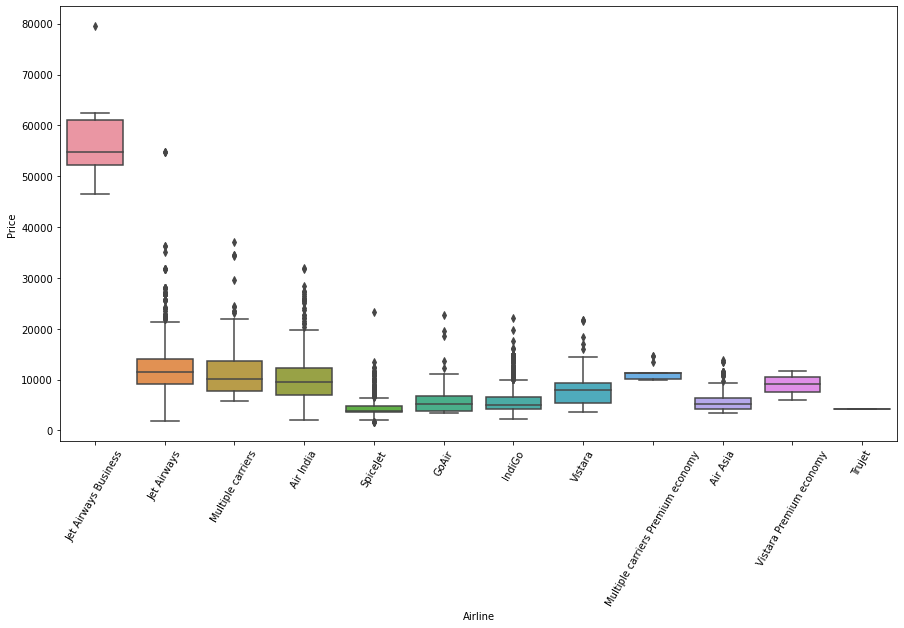

In [11]:
# Airline vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

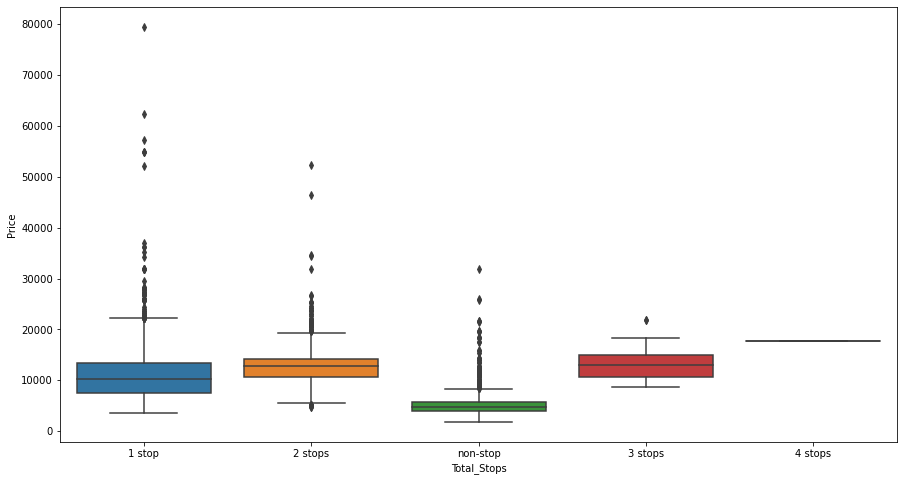

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

<Figure size 1080x1080 with 0 Axes>

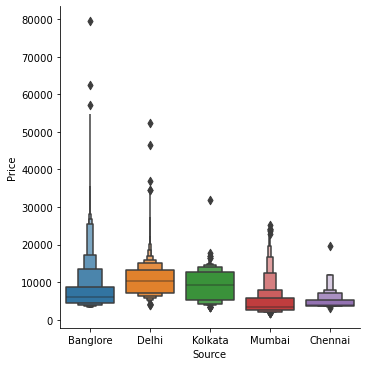

In [13]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

<AxesSubplot:xlabel='Source', ylabel='Price'>

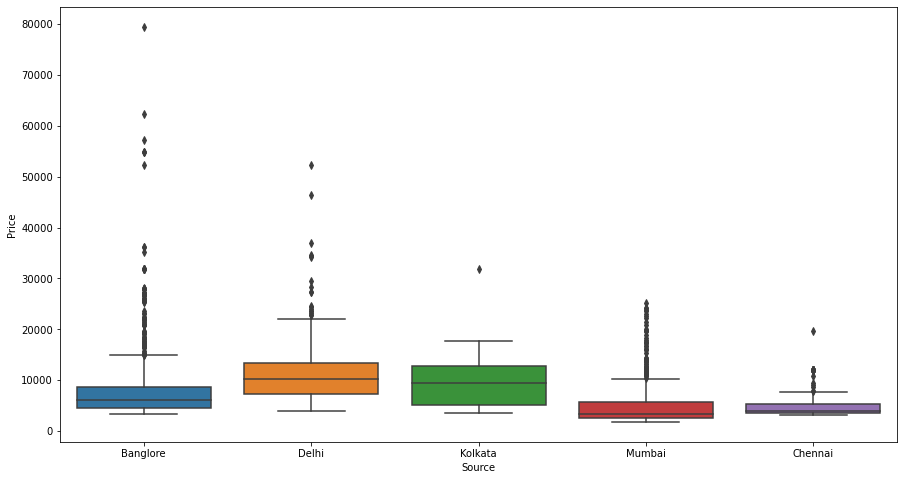

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

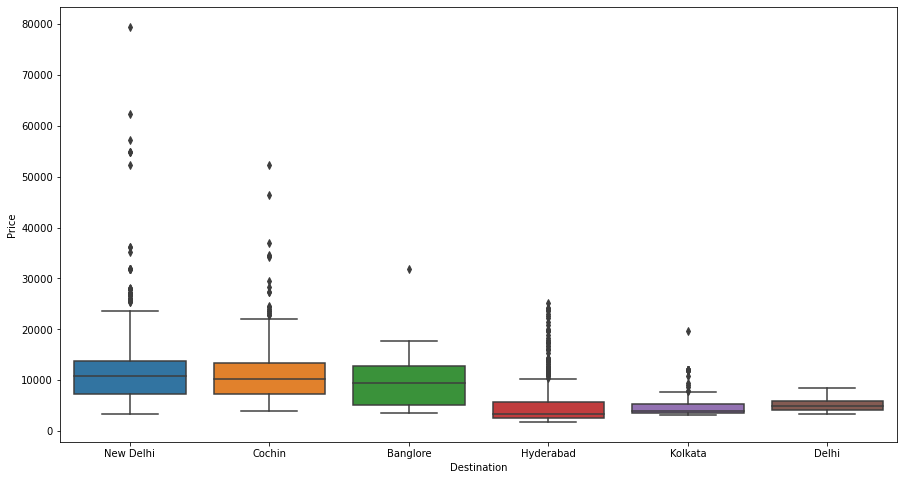

In [15]:
#Destination vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

## Data Cleaning and pre-processing

#### Null Check

In [16]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

#### Essentially we have 1 value missing in Route and 1 in Total_stops

In [17]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


##### Both NaN values in one row, we can drop the row

In [18]:
# Also there are 2 invlaid records with duration of flights as 5m with 2 stops which is not possible, we can delete this 2 records as well
df[df['Duration'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327.0
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,NaN


In [19]:
df.drop(df.index[[9039,6474,2660]],axis=0,inplace=True)

#### Feature Engineering

In [20]:
df['Journey_Date'] = df['Date_of_Journey'].apply(lambda x : int(x.split('/')[0]))
df['Journey_Month'] = df['Date_of_Journey'].apply(lambda x : int(x.split('/')[1]))
df['Journey_Year'] = df['Date_of_Journey'].apply(lambda x : int(x.split('/')[2]))

In [21]:
df.drop(['Date_of_Journey','Route'],axis=1,inplace=True)

In [22]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [23]:
lr = LabelEncoder()
df['Airline'] = lr.fit_transform(df['Airline'])

In [24]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [25]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [26]:
# We would want same numerical representation for same cities in both source and destination
df['Source'] = df['Source'].map({'Banglore':1,'Kolkata':2,'Delhi':3,'New Delhi':3,'Chennai':4, 'Mumbai':5,'Cochin':6,'Hyderabad':7})
df['Destination'] = df['Destination'].map({'Banglore':1,'Kolkata':2,'Delhi':3,'New Delhi':3,'Chennai':4, 'Mumbai':5,'Cochin':6,'Hyderabad':7})

In [27]:
#Splitting Dep hours and min into different column
df['Dep_Time_min'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))
df['Dep_Time'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))

In [28]:
df['Arrival_Time_min'] = df['Arrival_Time'].apply(lambda x: int((x.split(' ')[0]).split(':')[1]))
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: int((x.split(' ')[0]).split(':')[0]))

In [29]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [30]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [31]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [32]:
df['Additional_Info'] = lr.fit_transform(df['Additional_Info'])

In [33]:
#Convert duration hours and mins to mins
df['Duration'] = df['Duration'].apply(lambda x : int(x.split(' ')[0].replace("h",""))*60 + int(x.split(' ')[1].replace("m","")) if len(x.split(' ')) > 1 else int(x.split(' ')[0].replace("h",""))*60)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13350 non-null  int32  
 1   Source            13350 non-null  int64  
 2   Destination       13350 non-null  int64  
 3   Dep_Time          13350 non-null  int64  
 4   Arrival_Time      13350 non-null  int64  
 5   Duration          13350 non-null  int64  
 6   Total_Stops       13350 non-null  int64  
 7   Additional_Info   13350 non-null  int32  
 8   Price             10680 non-null  float64
 9   Journey_Date      13350 non-null  int64  
 10  Journey_Month     13350 non-null  int64  
 11  Journey_Year      13350 non-null  int64  
 12  Dep_Time_min      13350 non-null  int64  
 13  Arrival_Time_min  13350 non-null  int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 1.4 MB


In [35]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Time_min,Arrival_Time_min
0,3,1,3,22,1,170,0,8,3897.0,24,3,2019,20,10
1,1,2,1,5,13,445,2,8,7662.0,1,5,2019,50,15
2,4,3,6,9,4,1140,2,8,13882.0,9,6,2019,25,25
3,3,2,1,18,23,325,1,8,6218.0,12,5,2019,5,30
4,3,1,3,16,21,285,1,8,13302.0,1,3,2019,50,35


#### Check For Outliers

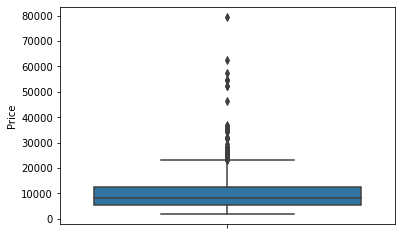

In [36]:
sns.boxplot(y=df['Price'])
plt.show()

In [45]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
    plt.show()

C:\Users\rklis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rklis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


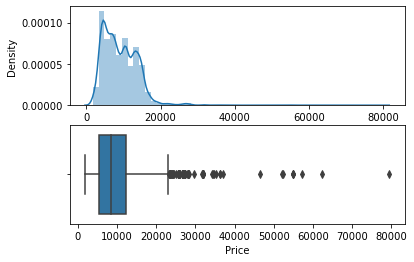

In [46]:
plot(df,'Price')

###### Handling outliers

In [47]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])